In [69]:
from feature_selector import FeatureSelector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [70]:
data = pd.read_csv('../data/MRI_data_1.csv')

# columns_to_drop = [	'Visit',	'Month']
# mri_data.drop(columns_to_drop, axis=1, inplace=True)

In [71]:
train = pd.read_csv('../data/MRI_data_1.csv')
train_labels = train['Diagnosis']
train = train.drop(columns = ['Diagnosis','Subject_ID','Key'])


In [72]:
## convert categorical columns type to cat
categorical_cols = ['Visit', 'Site', 'Sex', 'APOE' ]
train[categorical_cols] = train[categorical_cols].astype('category')

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 144 entries, Visit to EstimatedTotalIntraCranialVol
dtypes: category(4), float64(140)
memory usage: 1.1 MB


In [74]:
fs = FeatureSelector(data = train, labels = train_labels)

### Remove Single Unique Features

In [75]:
fs.identify_single_unique()

4 features with a single unique value.



In [76]:
fs.ops['single_unique']

['Left-WM-hypointensities',
 'Right-WM-hypointensities',
 'Left-non-WM-hypointensities',
 'Right-non-WM-hypointensities']

### Remove Multi-colinear Features

In [77]:
fs.identify_collinear(correlation_threshold=0.975)

11 features with a correlation magnitude greater than 0.97.



In [78]:
correlated_features = fs.ops['collinear']
correlated_features[:10]

['BrainSegVolNotVent.1',
 'BrainSegVolNotVentSurf',
 'CortexVol',
 'rhCerebralWhiteMatterVol',
 'CerebralWhiteMatterVol',
 'TotalGrayVol',
 'SupraTentorialVol',
 'SupraTentorialVolNotVent',
 'SupraTentorialVolNotVentVox',
 'SurfaceHoles']

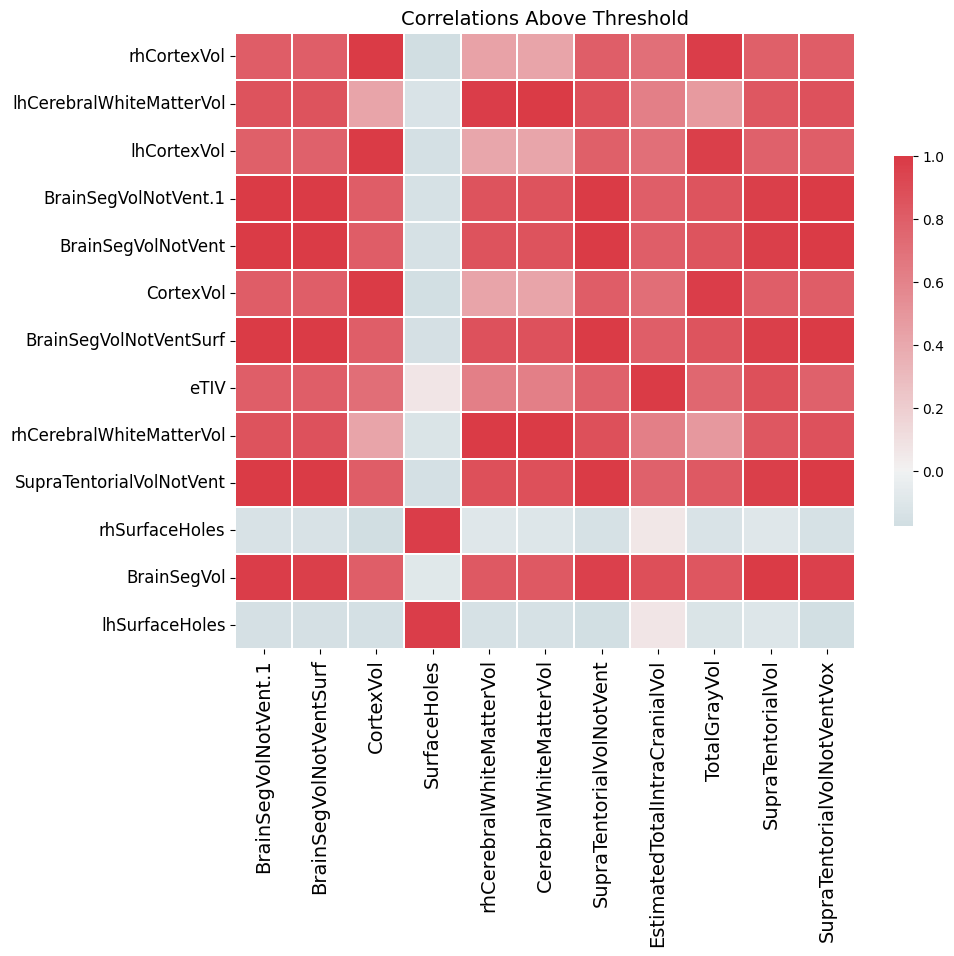

In [79]:
fs.plot_collinear()

In [80]:
fs.record_collinear

drop_feature              corr_feature  corr_value
0            BrainSegVolNotVent.1        BrainSegVolNotVent    1.000000
1          BrainSegVolNotVentSurf        BrainSegVolNotVent    0.998427
2          BrainSegVolNotVentSurf      BrainSegVolNotVent.1    0.998427
3                       CortexVol               lhCortexVol    0.991137
4                       CortexVol               rhCortexVol    0.991530
5        rhCerebralWhiteMatterVol  lhCerebralWhiteMatterVol    0.980496
6          CerebralWhiteMatterVol  lhCerebralWhiteMatterVol    0.995115
7          CerebralWhiteMatterVol  rhCerebralWhiteMatterVol    0.995109
8                    TotalGrayVol                 CortexVol    0.979845
9               SupraTentorialVol               BrainSegVol    0.993458
10       SupraTentorialVolNotVent        BrainSegVolNotVent    0.992754
11       SupraTentorialVolNotVent      BrainSegVolNotVent.1    0.992754
12       SupraTentorialVolNotVent    BrainSegVolNotVentSurf    0.994637
13    SupraTentorialVolNotVentVox        BrainSegVolNotVent    0.994445
14    SupraTentorialVolNotVentVox      BrainSegVolNotVent.1    0.994445
15    SupraTentorialVolNotVentVox    BrainSegVolNotVentSurf    0.992919
16    SupraTentorialVolNotVentVox  SupraTentorialVolNotVent    0.998097
17                   SurfaceHoles            lhSurfaceHoles    0.978013
18                   SurfaceHoles            rhSurfaceHoles    0.979693
19  EstimatedTotalIntraCranialVol                      eTIV    1.000000

### Zero Important Features

In [81]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'accuracy', n_iterations = 10)

Training Gradient Boosting Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33348
[LightGBM] [Info] Number of data points in the train set: 1009, number of used features: 153
[LightGBM] [Info] Start training from score -1.076073
[LightGBM] [Info] Start training from score -1.105574
[LightGBM] [Info] Start training from score -1.114597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [82]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 144 original features
There are 20 one-hot features


In [83]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[:5]

['non-WM-hypointensities', '5th-Ventricle', 'Site_5', 'Visit_4', 'Visit_5']

In [84]:
#drop the zero importance features
train_no_collinear_no_zero_importance = fs.remove(methods = ['zero_importance', 'collinear'])

Removed 22 features.


In [85]:
train_no_collinear_no_zero_importance

Visit_0  Visit_1  Visit_2  Visit_3  Site_0  Site_1  Site_2  Site_3  \
0           1        0        0        0       1       0       0       0   
1           0        1        0        0       1       0       0       0   
2           0        0        1        0       1       0       0       0   
3           1        0        0        0       1       0       0       0   
4           0        1        0        0       1       0       0       0   
...       ...      ...      ...      ...     ...     ...     ...     ...   
1004        1        0        0        0       0       0       0       0   
1005        0        0        0        1       0       0       0       0   
1006        1        0        0        0       0       0       0       0   
1007        0        0        0        1       0       0       0       0   
1008        1        0        0        0       0       0       0       0   

      Site_4  Sex_0  ...  BrainSegVol  lhCortexVol  rhCortexVol  \
0          0      1  ...     926003.0  174177.4778  171640.3232   
1          0      1  ...     924305.0  166905.7707  162216.0014   
2          0      1  ...     925382.0  167066.5581  168541.5319   
3          0      1  ...    1011586.0  203695.9978  182858.7837   
4          0      1  ...    1002071.0  203115.9686  182255.2786   
...      ...    ...  ...          ...          ...          ...   
1004       0      1  ...     889677.0  160750.4857  158168.3125   
1005       0      1  ...     883693.0  160802.0758  160279.0441   
1006       0      0  ...     934310.0  177021.4764  175083.0216   
1007       0      0  ...     937042.0  178862.6624  177003.4186   
1008       0      1  ...     960552.0  179964.0480  178604.5934   

      lhCerebralWhiteMatterVol  SubCortGrayVol    MaskVol BrainSegVol-to-eTIV  \
0                  184191.9575         40324.0  1361906.0            0.664587   
1                  192981.9801         38797.0  1319352.0            0.659338   
2                  189605.4005         39722.0  1342921.0            0.660968   
3                  199432.8506         45318.0  1515148.0            0.652202   
4                  195086.1362         44336.0  1508917.0            0.643059   
...                        ...             ...        ...                 ...   
1004               195236.8035         43989.0  1291996.0            0.694822   
1005               193091.3118         43329.0  1254851.0            0.697605   
1006               201773.2805         40044.0  1410540.0            0.684031   
1007               204008.1402         40428.0  1428442.0            0.685443   
1008               202757.2365         43025.0  1335847.0            0.705282   

     MaskVol-to-eTIV  lhSurfaceHoles rhSurfaceHoles  
0           0.977432            24.0           13.0  
1           0.941138            23.0           17.0  
2           0.959201            30.0           24.0  
3           0.976865            22.0           21.0  
4           0.968317            20.0            9.0  
...              ...             ...            ...  
1004        1.009026            20.0           14.0  
1005        0.990604            17.0           16.0  
1006        1.032691            35.0           29.0  
1007        1.044901            39.0           34.0  
1008        0.980842            20.0           16.0  

[1009 rows x 142 columns]

### Feature Importance

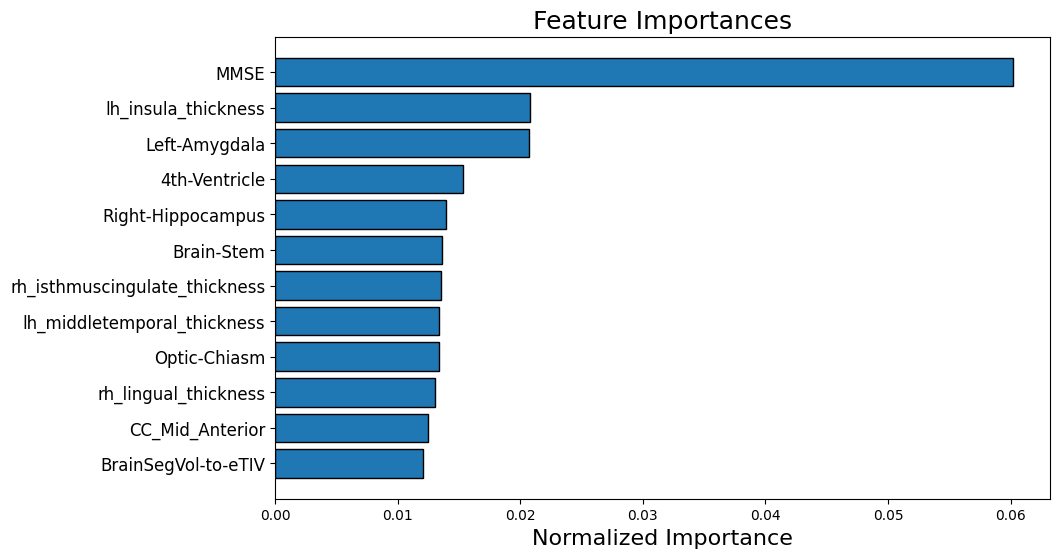

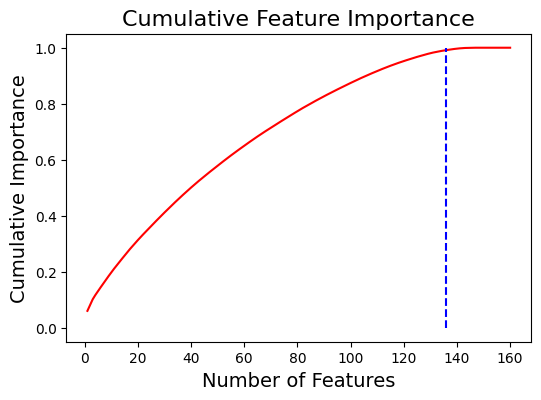

136 features required for 0.99 of cumulative importance


In [86]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [87]:
fs.feature_importances.head(10)

feature  importance  normalized_importance  \
0                           MMSE      2012.0               0.060203   
1            lh_insula_thickness       695.0               0.020796   
2                  Left-Amygdala       692.0               0.020706   
3                  4th-Ventricle       512.0               0.015320   
4              Right-Hippocampus       467.0               0.013974   
5                     Brain-Stem       456.0               0.013645   
6  rh_isthmuscingulate_thickness       452.0               0.013525   
7    lh_middletemporal_thickness       446.0               0.013345   
8                   Optic-Chiasm       446.0               0.013345   
9           rh_lingual_thickness       435.0               0.013016   

   cumulative_importance  
0               0.060203  
1               0.080999  
2               0.101706  
3               0.117026  
4               0.130999  
5               0.144644  
6               0.158169  
7               0.171514  
8               0.184859  
9               0.197876

In [88]:
fs.identify_low_importance(cumulative_importance = 0.99)

135 features required for cumulative importance of 0.99 after one hot encoding.
25 features do not contribute to cumulative importance of 0.99.



In [89]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['APOE_0', 'BrainSegVol', 'CerebralWhiteMatterVol', 'Visit_1', 'APOE_2']

In [90]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 38 features including one-hot features.


In [91]:
train_removed_all['Subject_ID'] = data['Key']
train_removed_all['Diagnosis'] = train_labels

In [92]:
train_removed_all.to_csv('../data/MRI_data_2.csv', index = False)